# Diabetes Prediction using KNN

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
pwd

'C:\\Users\\Lenovo'

In [3]:
train = pd.read_csv(r"C:/Users/Lenovo/Desktop/DS/diabetes.csv")

In [4]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [5]:
train.shape

(1999, 9)

In [6]:
train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
train["Outcome"].unique()

array([1, 0], dtype=int64)

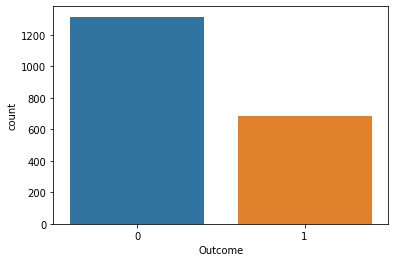

In [8]:
sns.countplot(x='Outcome',data=train)

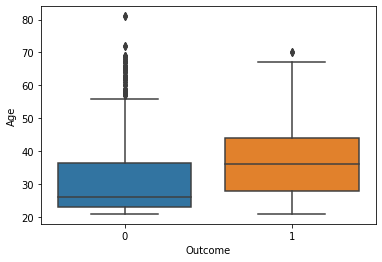

In [9]:
sns.boxplot(x='Outcome',y='Age',data=train)

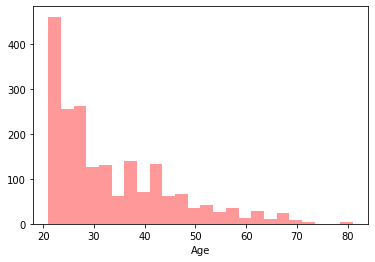

In [10]:
sns.distplot(train.Age,color='red',kde=False)

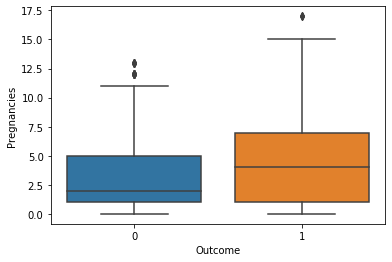

In [11]:
sns.boxplot(x='Outcome',y='Pregnancies',data=train)

In [12]:
zero_having_columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [13]:
for column in zero_having_columns:
    train[column]= train[column].replace(0,np.NaN)
    mean = int(train[column].mean(skipna=True))
    train[column]=train[column].replace(np.NaN,mean)

In [14]:
X = train.drop('Outcome', inplace=False, axis=1)
y = train['Outcome']
print(X.shape)
print(y.shape)

(1999, 8)
(1999,)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test  = sc_X.fit_transform(X_test)

In [17]:
import math
math.sqrt(len(y_test))

20.0

In [18]:
from sklearn.neighbors import KNeighborsClassifier
Classifier = KNeighborsClassifier(n_neighbors=19, p=2, metric='euclidean')

In [19]:
Classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [20]:
y_pred = Classifier.predict(X_test)
print(y_pred)

[0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1
 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0
 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0
 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0]


In [21]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[242  37]
 [ 33  88]]


In [22]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred))

0.7154471544715447


In [23]:
from sklearn.metrics import accuracy_score
print("Accuracy -->",accuracy_score(y_test,y_pred))

Accuracy --> 0.825


In [24]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       279
           1       0.70      0.73      0.72       121

    accuracy                           0.82       400
   macro avg       0.79      0.80      0.79       400
weighted avg       0.83      0.82      0.83       400

